# End-to-end notebook!

Here is the workflow:
* Sampling configs (sampling parameters, etc.) lead to...
* Weaving configs (blank model settings, donor model settings, layer assignments) lead to...
* Models (probably TFRobertaForSequenceClassification in all cases) lead to...
* Performance scores (numbers from 0-100)

In [1]:
# install dependencies

! pip install -q joblib  # joblib for memoizing functions
! pip install -q ipywidgets widgetsnbextension pandas-profiling # IProgress for progress bars

In [2]:
# Add model_merging to the python path

import os
import sys

model_merging_base = os.path.abspath("../model_merging/")
# assert it exist
assert os.path.exists(model_merging_base)
if model_merging_base not in sys.path:
    sys.path.append(model_merging_base)

In [3]:
# import joblib for caching and distributed computing
from math import sqrt

from joblib import Memory, Parallel, delayed

memory = Memory(location="cache", verbose=10)

parallel = Parallel(n_jobs=2, return_as="generator")
output_generator = parallel(delayed(sqrt)(i**2) for i in range(10))

In [4]:
# Imports and cached functions

import os

from llm_weaver import (
    calculate_score_from_weaving_config,
    test_weaver,
)

# Disable parallelism in tokenizers to avoid deadlocks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

calculate_score_from_weaving_config_cached = memory.cache(
    calculate_score_from_weaving_config
)
test_weaver_cached = memory.cache(test_weaver)

## Step 0: Test weaving code

This test makes sure that our score when using the weaver to reconstruct a model from all its parts get the same evaluation score as the original model

In [5]:
model_ids = [
    "textattack/roberta-base-RTE",
    "textattack/roberta-base-MNLI",
]

# for model_id in model_ids:
#     test_weaver(model_id)

# You can run this more than once, and it will pull from the cache on subsequent runs
Parallel(n_jobs=2, return_as="list")(
    delayed(test_weaver_cached)(model_id) for model_id in model_ids
)

[MemorizedFunc(func=<function test_weaver at 0x2c98a9790>, location=cache/joblib)]: Clearing function cache identified by llm_weaver/test_weaver
[MemorizedFunc(func=<function test_weaver at 0x2c71c5790>, location=cache/joblib)]: Clearing function cache identified by llm_weaver/test_weaver


________________________________________________________________________________
[Memory] Calling llm_weaver.test_weaver...
test_weaver('textattack/roberta-base-MNLI')
________________________________________________________________________________
[Memory] Calling llm_weaver.test_weaver...
test_weaver('textattack/roberta-base-RTE')


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


calculating score for weaving config md5sum: 756986b041cd5656d4878287e6fef62f
calculating score for weaving config md5sum: 367fed3b6bf1fd31867ef1207a026479
Loading textattack/roberta-base-RTE
Loading textattack/roberta-base-MNLI


/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:221: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

calculating score for weaving config md5sum: 3f302d2841d5e9508a8e33464b313985
calculating score for weaving config md5sum: c87dd0438cfc04d8acd9371cc8fb05f9
Loading textattack/roberta-base-RTE
Loading textattack/roberta-base-MNLI


/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:221: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

calculating score for weaving config md5sum: 64b8d72806f9123d7a952fb0df71b630
calculating score for weaving config md5sum: 2de68b10f030533e464532058b3b6081
Loading textattack/roberta-base-RTE
Loading textattack/roberta-base-MNLI


/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:221: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

Original score (textattack/roberta-base-RTE): {'accuracy': 0.7}
Weaved score (textattack/roberta-base-RTE): {'accuracy': 0.7}
Linear combo weaved score (textattack/roberta-base-RTE): {'accuracy': 0.7}
Fisher weaved score (textattack/roberta-base-RTE): {'accuracy': 0.7}
_____________________________________________________test_weaver - 46.0s, 0.8min
Original score (textattack/roberta-base-MNLI): {'accuracy': 0.3}
Weaved score (textattack/roberta-base-MNLI): {'accuracy': 0.3}
Linear combo weaved score (textattack/roberta-base-MNLI): {'accuracy': 0.3}
Fisher weaved score (textattack/roberta-base-MNLI): {'accuracy': 0.3}
_____________________________________________________test_weaver - 46.4s, 0.8min


[([{'accuracy': 0.7}, {'accuracy': 0.7}, {'accuracy': 0.7}, {'accuracy': 0.7}],
  [None,
   {'glue_task': 'rte',
    'tokenizer_model_id': 'textattack/roberta-base-RTE',
    'blank_model_config': {'return_dict': True,
     'output_hidden_states': False,
     'output_attentions': False,
     'torchscript': False,
     'torch_dtype': None,
     'use_bfloat16': False,
     'tf_legacy_loss': False,
     'pruned_heads': {},
     'tie_word_embeddings': True,
     'is_encoder_decoder': False,
     'is_decoder': False,
     'cross_attention_hidden_size': None,
     'add_cross_attention': False,
     'tie_encoder_decoder': False,
     'max_length': 20,
     'min_length': 0,
     'do_sample': False,
     'early_stopping': False,
     'num_beams': 1,
     'num_beam_groups': 1,
     'diversity_penalty': 0.0,
     'temperature': 1.0,
     'top_k': 50,
     'top_p': 1.0,
     'typical_p': 1.0,
     'repetition_penalty': 1.0,
     'length_penalty': 1.0,
     'no_repeat_ngram_size': 0,
     'encoder_n

## Steps 1-3: configs to graph


In [6]:
# Function to sample configs
import random

from llm_weaver import dict_overwrite, get_model_config


def sample_weave_configs_iter(p=0.5, seed=42, max_configs=1):
    # set random seed
    random.seed(seed)

    donor_model_ids = [
        "textattack/roberta-base-RTE",
        "textattack/roberta-base-MNLI",
    ]
    blank_model_config = dict_overwrite(
        get_model_config("textattack/roberta-base-RTE"),
        {
            "num_hidden_layers": 12 ,
        },
    )
    for _ in range(max_configs):
        config = {
            "glue_task": "rte",
            "tokenizer_model_id": "textattack/roberta-base-RTE",
            # The task (i.e. the classification head output size should match the task at hand)
            "blank_model_config": blank_model_config,
            # Layer assignments
            "layer_assignments": [
                {
                    "type": "SingleLayer",
                    "params": {
                        # Load donor model # Choose a random donor model according to the p parameter
                        "donor": random.choices(donor_model_ids, weights=[p, 1 - p])[0],
                        # Pick a layer
                        "hidden_layer_number": i,
                    },
                }
                for i in range(12)
            ],
            # The head (i.e. the classification head should match the task at hand)
            # THESE ARE DIFFERENT BETWEEN RTE AND MNLI
            "classification_head": {
                "type": "SingleClassificationHead",
                "params": {
                    "donor": "textattack/roberta-base-RTE",
                },
            },
            # The embeddings layer
            # THESE ARE DIFFERENT BETWEEN RTE AND MNLI
            "embeddings": {
                "type": "SingleEmbeddings",
                "params": {
                    "donor": "textattack/roberta-base-RTE",
                },
            },
        }

        yield config


sample_config = dict(p=0.5, seed=42, max_configs=100)

# Generate the sample configs and save to a file just in case
weave_configs = list(sample_weave_configs_iter(**sample_config))


len(weave_configs)

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


100

________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='validation')
calculating score for weaving config md5sum: 98361db8aed5fbcc51290cd4edcb0

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can 

Loading textattack/roberta-base-MNLI
Loading textattack/roberta-base-RTE
Loading textattack/roberta-base-MNLI
Loading textattack/roberta-base-MNLI
Loading textattack/roberta-base-RTE


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can 

_____________________________calculate_score_from_weaving_config - 61.7s, 1.0min
_____________________________calculate_score_from_weaving_config - 64.6s, 1.1min
_____________________________calculate_score_from_weaving_config - 64.8s, 1.1min
_____________________________calculate_score_from_weaving_config - 64.9s, 1.1min
_____________________________calculate_score_from_weaving_config - 65.1s, 1.1min


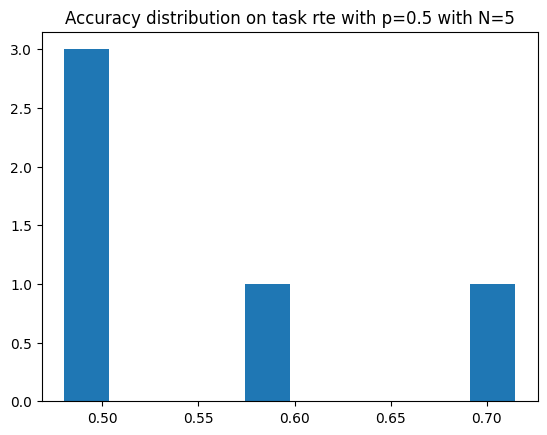

In [7]:
import matplotlib.pyplot as plt


def sample_config_to_plots(sample_config, n_jobs=5):
    weave_configs = list(
        sample_weave_configs_iter(**sample_config),
    )

    scores = Parallel(n_jobs=n_jobs, return_as="list")(
        delayed(calculate_score_from_weaving_config_cached)(
            weave_config,
            n_examples=4096,
            split="validation",
        )
        for weave_config in weave_configs
    )
    accuracies = [score["accuracy"] for score in scores]

    title = f"Accuracy distribution on task {weave_configs[0]['glue_task']} with p={sample_config['p']} with N={len(accuracies)}"

    # create figure and ax
    fig, ax = plt.subplots()
    ax.hist(accuracies, bins=10)
    ax.set_title(title)
    plt.show()

    return accuracies, weave_configs


accuracies, weave_configs = sample_config_to_plots(
    dict(p=0.5, seed=42, max_configs=5),
)

[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/1bec1a39a966bfc720c35cd575945ee7
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/1a9cf0cf45c1a6c0d475f9baf72bc8e6
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/081e27a9c4ade95b002fa3f8f3d523a9
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/5a6a8057fb8ccaf3ec76155940ce57eb
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
[Memory]: Loading calculate_score_from_weaving_config from cache/job

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 46.3s, 0.8min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Loading textattack/roberta-base-MNLI
Loading textattack/roberta-base-RTE
Loading textattack/roberta-base-MNLI
Loading textattack/roberta-base-RTE


/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='validation')
calculating score for weaving config md5sum: 07df9df670f1169965a49031d86b8

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Loading textattack/roberta-base-RTE


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/model_merging/model_merging/evaluation.py:7: FutureWarning: load_metric i

_____________________________calculate_score_from_weaving_config - 50.6s, 0.8min
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/dc1b2852ae29cb3e88668f7884062bbf
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attentio

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 53.1s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

____________________________calculate_score_from_weaving_config - 112.5s, 1.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 63.3s, 1.1min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 58.4s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 58.8s, 1.0min
_____________________________calculate_score_from_weaving_config - 59.4s, 1.0min
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/8efd3b47fb56675098a0d7b1f6eb6427
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
              

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.5s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 58.3s, 1.0min


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Loading textattack/roberta-base-MNLI
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='validation')
calculating score for weaving config 

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:52

_____________________________calculate_score_from_weaving_config - 57.0s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 58.6s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.2s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 60.9s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 61.4s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 62.1s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 61.7s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 63.2s, 1.1min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 58.6s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.1s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 61.3s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 60.4s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 57.7s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 61.3s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.7s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.3s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 58.5s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.5s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 58.9s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.9s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 60.5s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.9s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 60.2s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 60.2s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 59.0s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 63.6s, 1.1min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 60.4s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 61.6s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 57.1s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.7s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 56.4s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.9s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 55.0s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 57.1s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 57.9s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.2s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 57.7s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 59.5s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


Loading textattack/roberta-base-RTE
Loading textattack/roberta-base-MNLI


/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 57.7s, 1.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 56.9s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 56.2s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 56.5s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 56.5s, 0.9min
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/e6e9002e24b58507b833ff1081f4f7b2
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attentio

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 54.5s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 54.7s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 54.3s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.1s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 55.5s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 53.1s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.7s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.5s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 54.1s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 53.4s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.3s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 55.0s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning

_____________________________calculate_score_from_weaving_config - 55.6s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 56.5s, 0.9min
________________________________________________________________________________
[Memory] Calling llm_weaver.calculate_score_from_weaving_config...
calculate_score_from_weaving_config({ 'blank_model_config': { 'add_cross_attention': False,
                          'architectures': ['RobertaForSequenceClassification'],
                          'attention_probs_dropout_prob': 0.1,
                          'bad_words_ids': None,
                          'begin_suppress_tokens': None,
                          'bos_token_id': 0,
                          'chunk_size_feed_forward': 0,
                          'classifier_dropout': None,
                          'cross_attention_hidden_size': None,
                          'decoder_start_token_id': None,
                          'diversity_penalty': 0.0,
                          'do_sample': False,
                    ..., n_examples=4096, split='valida

/Users/hivamoh/Desktop/CS194/2023-fall-cs-194-294-merging-llms/.venv/lib/python3.8/site-packages/transformers/data/processors/glue.py:520: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


_____________________________calculate_score_from_weaving_config - 56.9s, 0.9min
_____________________________calculate_score_from_weaving_config - 53.4s, 0.9min
_____________________________calculate_score_from_weaving_config - 53.4s, 0.9min
_____________________________calculate_score_from_weaving_config - 47.1s, 0.8min
_____________________________calculate_score_from_weaving_config - 34.2s, 0.6min


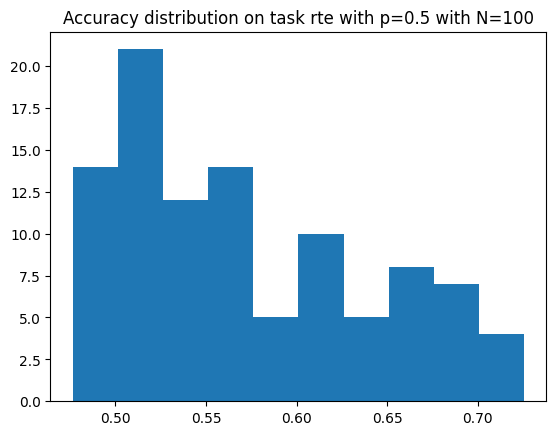

In [8]:
accuracies, weave_configs = sample_config_to_plots(
    dict(p=0.5, seed=42, max_configs=100),
)

### Investigate the models that did so well

In [9]:
# Get max accuracy index
max_accuracy_index = accuracies.index(max(accuracies))
# accuracies

# Get the best config/
best_config = weave_configs[max_accuracy_index]

from pprint import pprint

pprint(max(accuracies))
pprint(best_config)

0.7256317689530686
{'blank_model_config': {'add_cross_attention': False,
                        'architectures': ['RobertaForSequenceClassification'],
                        'attention_probs_dropout_prob': 0.1,
                        'bad_words_ids': None,
                        'begin_suppress_tokens': None,
                        'bos_token_id': 0,
                        'chunk_size_feed_forward': 0,
                        'classifier_dropout': None,
                        'cross_attention_hidden_size': None,
                        'decoder_start_token_id': None,
                        'diversity_penalty': 0.0,
                        'do_sample': False,
                        'early_stopping': False,
                        'encoder_no_repeat_ngram_size': 0,
                        'eos_token_id': 2,
                        'exponential_decay_length_penalty': None,
                        'finetuning_task': 'glue:rte',
                        'forced_bos_token_id': None,


In [10]:
pprint(best_config['layer_assignments'])

[{'params': {'donor': 'textattack/roberta-base-MNLI', 'hidden_layer_number': 0},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-MNLI', 'hidden_layer_number': 1},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-MNLI', 'hidden_layer_number': 2},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-MNLI', 'hidden_layer_number': 4},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 8},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-

### Repeating one Layer 

In [11]:
# Function to sample configs
import random

from llm_weaver import dict_overwrite, get_model_config


def sample_weave_configs_iter_layers(p=0.5, seed=42, max_configs=1):

    donor_model_ids = [
        "textattack/roberta-base-RTE",
        "textattack/roberta-base-RTE",
    ]
    blank_model_config = dict_overwrite(
        get_model_config("textattack/roberta-base-RTE"),
        {
            "num_hidden_layers": 13 ,
        },
    )
    num_hidden_layers = 13
    layers_to_repeat = [i for i in range(num_hidden_layers-1)]
    print(layers_to_repeat)
    
    for config_index in range(max_configs):
        repeat_layer = layers_to_repeat[config_index]
        # repeat_layer = 0
        layer_assignments = []
        for i in range(num_hidden_layers-1):
            layer_assignment = {
                "type": "SingleLayer",
                "params": {
                    "donor": random.choices(donor_model_ids, weights=[p, 1 - p])[0],
                    "hidden_layer_number": i,
                },
            }
            layer_assignments.append(layer_assignment)
            
            print(layer_assignment)

            # Repeat the selected layer
            if i == repeat_layer:
                # print(i) 
                layer_assignment = {
                    "type": "SingleLayer",
                    "params": {
                        "donor": random.choices(donor_model_ids, weights=[p, 1 - p])[0],
                        "hidden_layer_number": i,
                        },
                    }
                print(layer_assignment)
                layer_assignments.append(layer_assignment)
        print(len(layer_assignments))
        config = {
            "glue_task": "rte",
            "tokenizer_model_id": "textattack/roberta-base-RTE",
            "blank_model_config": blank_model_config,
            "layer_assignments": layer_assignments,
            "classification_head": {
                "type": "SingleClassificationHead",
                "params": {
                    "donor": "textattack/roberta-base-RTE",
                },
            },
            "embeddings": {
                "type": "SingleEmbeddings",
                "params": {
                    "donor": "textattack/roberta-base-RTE",
                },
            },
        }
        yield config  


sample_config = dict(p=0.5, seed=42, max_configs=12)

# Generate the sample configs and save to a file just in case
weave_configs = list(sample_weave_configs_iter_layers(**sample_config))


len(weave_configs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7}}
{'type': 'SingleLayer', 'params': {'donor':

12

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6}}
{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7}}
{'type': 'SingleLayer', 'params': {'donor':

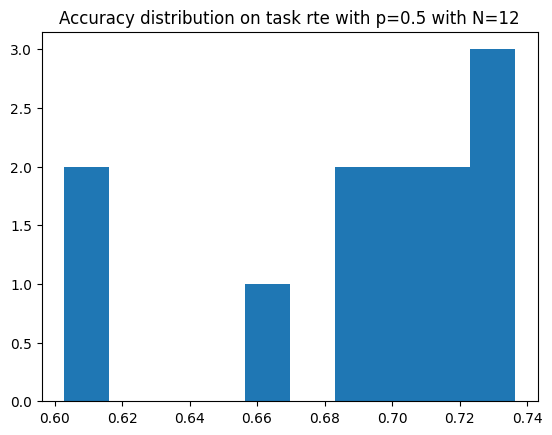

In [12]:
import matplotlib.pyplot as plt
accuracies = []

def sample_config_to_plots(sample_config, n_jobs=5):
    weave_configs = list(
        sample_weave_configs_iter_layers(**sample_config),
    )
    # for config in weave_configs:
        
    #     print(config['layer_assignments'])
    scores = Parallel(n_jobs=n_jobs, return_as="list")(
        delayed(calculate_score_from_weaving_config_cached)(
            weave_config,
            n_examples=4096,
            split="validation",
        )
        for weave_config in weave_configs
    )
    accuracies = [score["accuracy"] for score in scores]
    print(accuracies)

    title = f"Accuracy distribution on task {weave_configs[0]['glue_task']} with p={sample_config['p']} with N={len(accuracies)}"

    # create figure and ax
    fig, ax = plt.subplots()
    ax.hist(accuracies, bins=10)
    ax.set_title(title)
    plt.show()

    return accuracies, weave_configs


accuracies, weave_configs = sample_config_to_plots(
    dict(p=0.5, seed=42, max_configs=12),
)

In [13]:
# Get max accuracy index
max_accuracy_index = accuracies.index(max(accuracies))
# accuracies

# Get the best config
best_config = weave_configs[max_accuracy_index]

from pprint import pprint

pprint(max(accuracies))
pprint(best_config)

0.7364620938628159
{'blank_model_config': {'add_cross_attention': False,
                        'architectures': ['RobertaForSequenceClassification'],
                        'attention_probs_dropout_prob': 0.1,
                        'bad_words_ids': None,
                        'begin_suppress_tokens': None,
                        'bos_token_id': 0,
                        'chunk_size_feed_forward': 0,
                        'classifier_dropout': None,
                        'cross_attention_hidden_size': None,
                        'decoder_start_token_id': None,
                        'diversity_penalty': 0.0,
                        'do_sample': False,
                        'early_stopping': False,
                        'encoder_no_repeat_ngram_size': 0,
                        'eos_token_id': 2,
                        'exponential_decay_length_penalty': None,
                        'finetuning_task': 'glue:rte',
                        'forced_bos_token_id': None,


In [14]:
pprint(best_config['layer_assignments'])

[{'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base

### Skipping a layer

In [15]:
# Function to sample configs
import random

from llm_weaver import dict_overwrite, get_model_config


def sample_weave_configs_iter_layers(p=0.5, seed=42, max_configs=1):

    donor_model_ids = [
        "textattack/roberta-base-RTE",
        # "textattack/roberta-base-MNLI",
        "textattack/roberta-base-RTE",
    ]
    blank_model_config = dict_overwrite(
        get_model_config("textattack/roberta-base-RTE"),
        {
            "num_hidden_layers": 11,
        },
    )
    
    skip_layer = 0  # Initialize skip_layer variable

    for _ in range(max_configs):
        # print(skip_layer)
        config = {
            "glue_task": "rte",
            "tokenizer_model_id": "textattack/roberta-base-RTE",
            "blank_model_config": blank_model_config,
            "layer_assignments": [
                {
                    "type": "SingleLayer",
                    "params": {
                        "donor": random.choices(donor_model_ids, weights=[p, 1 - p])[0],
                        "hidden_layer_number": i,
                    },
                }
                for i in range(12) if i != skip_layer 
            ],
            "classification_head": {
                "type": "SingleClassificationHead",
                "params": {
                    "donor": "textattack/roberta-base-RTE",
                },
            },
            "embeddings": {
                "type": "SingleEmbeddings",
                "params": {
                    "donor": "textattack/roberta-base-RTE",
                },
            },
        }
        print(config['layer_assignments'])
        # print(len(config['layer_assignments']))
        yield config
        skip_layer = (skip_layer + 1) % 12  # Increment skip_layer for the next configuration



sample_config = dict(p=0.5, seed=42, max_configs=12)
# Generate the sample configs and save to a file just in case
weave_configs = list(sample_weave_configs_iter_layers(**sample_config))


# len(weave_configs)

[{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 8}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 9}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE

[{'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 8}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 9}}, {'type': 'SingleLayer', 'params': {'donor': 'textattack/roberta-base-RTE

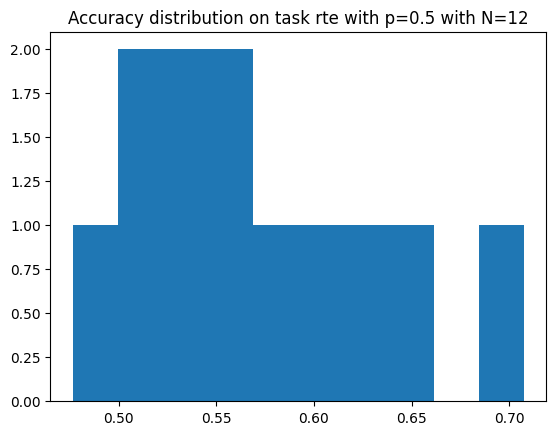

In [16]:
import matplotlib.pyplot as plt


def sample_config_to_plots(sample_config, n_jobs=5):
    accuracies = []
    weave_configs = list(
        sample_weave_configs_iter_layers(**sample_config),
    )
    # for config in weave_configs:
        
    #     # print(config['layer_assignments'])
    scores = Parallel(n_jobs=n_jobs, return_as="list")(
        delayed(calculate_score_from_weaving_config_cached)(
            weave_config,
            n_examples=4096,
            split="validation",
        )
        for weave_config in weave_configs
    )
    accuracies = [score["accuracy"] for score in scores]
    print(accuracies)

    title = f"Accuracy distribution on task {weave_configs[0]['glue_task']} with p={sample_config['p']} with N={len(accuracies)}"

    # create figure and ax
    fig, ax = plt.subplots()
    ax.hist(accuracies, bins=10)
    ax.set_title(title)
    plt.show()

    return accuracies, weave_configs


accuracies, weave_configs = sample_config_to_plots(
    dict(p=0.5, seed=42, max_configs=12),
)

In [17]:
# Get max accuracy index
max_accuracy_index = accuracies.index(max(accuracies))
# accuracies

# Get the best config
best_config = weave_configs[max_accuracy_index]

from pprint import pprint

pprint(max(accuracies))
# pprint(best_config)
pprint(best_config['layer_assignments'])

0.7075812274368231
[{'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 8},
  'type': 'SingleLayer'},
 {'params': {'donor': 'text

### Heat map - Trying all permutations

In [23]:

import random
from itertools import product
from llm_weaver import dict_overwrite, get_model_config

def sample_weave_configs_iter_layers(p=0.5, seed=42, max_configs=144):
    donor_model_ids = [
        "textattack/roberta-base-RTE",
        "textattack/roberta-base-RTE",
    ]
    base_model_config = get_model_config("textattack/roberta-base-RTE")
    config_id = 0  # Initialize config_id to keep track of the number of configurations
    random.seed(seed)
    # all_pairs = list(product(range(12), repeat=2))  # Create pairs (x, y) for x, y in range(12)

    # for x, y in all_pairs[:max_configs]:  # Limit to max_configs
    for x in range(12):
        for y in range(12):
            if config_id >= max_configs:
                return  # Stop when the maximum number of configurations is reached
            layer_assignments = [
                {
                    "type": "SingleLayer",
                    "params": {
                        "donor": random.choices(donor_model_ids, weights=[p, 1 - p])[0],
                        "hidden_layer_number": i,
                    },
                }
                for i in list(range(0, x + 1)) + list(range(y, 12))  # Range from 0 to x+1 and y to num_hidden_layers
            ]

            # Update the num_hidden_layers in the blank_model_config
            blank_model_config = dict_overwrite(
                base_model_config,
                {
                    "num_hidden_layers": len(layer_assignments),
                },
            )
            print(len(layer_assignments))
            config = {
                "glue_task": "rte",
                "tokenizer_model_id": "textattack/roberta-base-RTE",
                "blank_model_config": blank_model_config,
                "layer_assignments": layer_assignments,
                "classification_head": {
                    "type": "SingleClassificationHead",
                    "params": {
                        "donor": "textattack/roberta-base-RTE",
                    },
                },
                "embeddings": {
                    "type": "SingleEmbeddings",
                    "params": {
                        "donor": "textattack/roberta-base-RTE",
                    },
                },
            }
            yield config

sample_config = dict(p=0.5, seed=42, max_configs=144)
# Generate the sample configs and save to a file just in case
weave_configs = list(sample_weave_configs_iter_layers(**sample_config))
print(len(weave_configs))


13
12
11
10
9
8
7
6
5
4
3
2
14
13
12
11
10
9
8
7
6
5
4
3
15
14
13
12
11
10
9
8
7
6
5
4
16
15
14
13
12
11
10
9
8
7
6
5
17
16
15
14
13
12
11
10
9
8
7
6
18
17
16
15
14
13
12
11
10
9
8
7
19
18
17
16
15
14
13
12
11
10
9
8
20
19
18
17
16
15
14
13
12
11
10
9
21
20
19
18
17
16
15
14
13
12
11
10
22
21
20
19
18
17
16
15
14
13
12
11
23
22
21
20
19
18
17
16
15
14
13
12
24
23
22
21
20
19
18
17
16
15
14
13
144


13
12
11
10
9
8
7
6
5
4
3
2
14
13
12
11
10
9
8
7
6
5
4
3
15
14
13
12
11
10
9
8
7
6
5
4
16
15
14
13
12
11
10
9
8
7
6
5
17
16
15
14
13
12
11
10
9
8
7
6
18
17
16
15
14
13
12
11
10
9
8
7
19
18
17
16
15
14
13
12
11
10
9
8
20
19
18
17
16
15
14
13
12
11
10
9
21
20
19
18
17
16
15
14
13
12
11
10
22
21
20
19
18
17
16
15
14
13
12
11
23
22
21
20
19
18
17
16
15
14
13
12
24
23
22
21
20
19
18
17
16
15
14
13
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/8f592012e1ab11728a708b7a8ddd286a
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/44fdc3884589e08b3574c913901f2cf0
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
_________________calculate_score_from_weaving_config cache loaded - 0.0s, 0.0min
[Memory]: Loading calculate_score_from_weaving_config from cache/joblib/llm_weaver/calculate_score_from_weaving_config/493c7eba36d1b8379b2

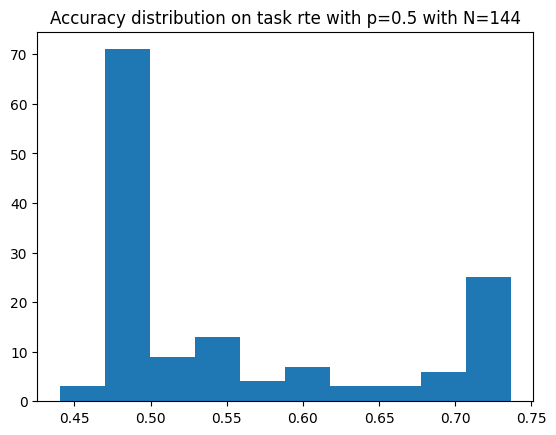

In [24]:
import matplotlib.pyplot as plt


def sample_config_to_plots(sample_config, n_jobs=5):
    accuracies = []
    weave_configs = list(
        sample_weave_configs_iter_layers(**sample_config),
    )
    # for config in weave_configs:
        
    #     # print(config['layer_assignments'])
    scores = Parallel(n_jobs=n_jobs, return_as="list")(
        delayed(calculate_score_from_weaving_config_cached)(
            weave_config,
            n_examples=4096,
            split="validation",
        )
        for weave_config in weave_configs
    )
    accuracies = [score["accuracy"] for score in scores]
    print(accuracies)

    title = f"Accuracy distribution on task {weave_configs[0]['glue_task']} with p={sample_config['p']} with N={len(accuracies)}"

    # create figure and ax
    fig, ax = plt.subplots()
    ax.hist(accuracies, bins=10)
    ax.set_title(title)
    plt.show()

    return accuracies, weave_configs


accuracies, weave_configs = sample_config_to_plots(
    dict(p=0.5, seed=42, max_configs=12),
)

In [25]:
# Get max accuracy index
max_accuracy_index = accuracies.index(max(accuracies))
# accuracies

# Get the best config
best_config = weave_configs[max_accuracy_index]

from pprint import pprint

pprint(max(accuracies))
# pprint(best_config)
pprint(best_config['layer_assignments'])\
    

0.7364620938628159
[{'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 0},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 1},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 2},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 3},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 4},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 5},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 6},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7},
  'type': 'SingleLayer'},
 {'params': {'donor': 'textattack/roberta-base-RTE', 'hidden_layer_number': 7},
  'type': 'SingleLayer'},
 {'params': {'donor': 'text